# Laboratorio 1
## Integrantes:
- José Antonio Mérida -- 
- Joaquín Puente -- 22296 

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

## shampoo.csv

### Análisis exploratorio

/tmp/ipykernel_100296/1022166198.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos = pd.read_csv(f'datasets/{filename}',


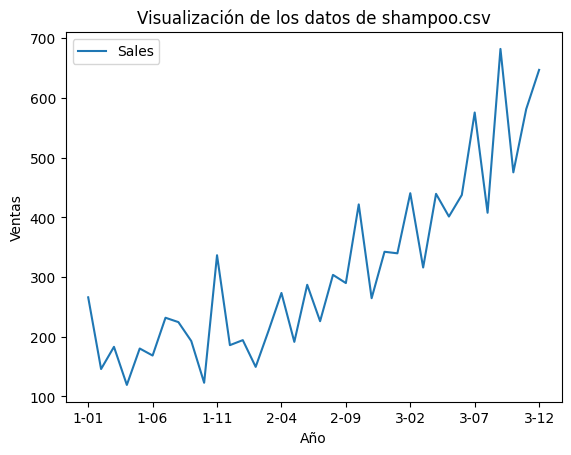

In [168]:
# Leer los datos
filename = 'shampoo.csv'
datos = pd.read_csv(f'datasets/{filename}',
                    index_col = 'Month',
                    parse_dates = True)

datos.index.freq = 'MS'

# Graficar los datos y predicciones

datos.plot(label = 'Observadod')

plt.legend()
plt.title(f"Visualización de los datos de {filename}")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.show()

### Promedios móviles

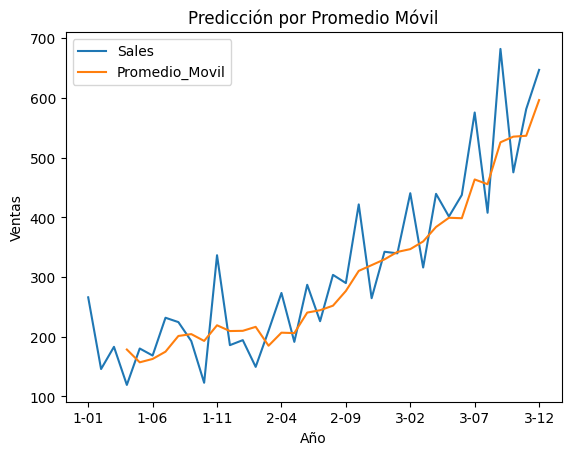

In [169]:
# Promedio Móvil
datos['Promedio_Movil'] = datos['Sales'].rolling(window = 4).mean()

# Graficar los datos y el Promedio Móvil
datos[['Sales', 'Promedio_Movil']].plot()
plt.title("Predicción por Promedio Móvil")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.show()

### Alisamiento exponencial

/home/Japo/Documents/workspaces/uvg/dataSience/Lab1/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/Japo/Documents/workspaces/uvg/dataSience/Lab1/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/Japo/Documents/workspaces/uvg/dataSience/Lab1/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/Japo/Documents/workspaces/uvg/dataSience/Lab1

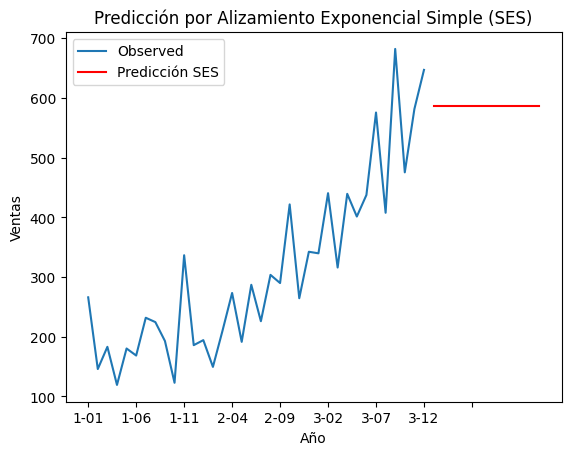

In [170]:
# Alizamiento Exponencial Simple
modelo = SimpleExpSmoothing(datos['Sales'])

# Ajustar (entrenar() el modelo
modelo_ajustado = modelo.fit()
prediccion = modelo_ajustado.forecast(12)

# Graficar los datos y las predicciones
datos['Sales'].plot(label = 'Observed')
prediccion.plot(label = 'Predicción SES', color = 'red')
plt.legend()
plt.title("Predicción por Alizamiento Exponencial Simple (SES)")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.show()

### Holt winters

/home/Japo/Documents/workspaces/uvg/dataSience/Lab1/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/Japo/Documents/workspaces/uvg/dataSience/Lab1/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/Japo/Documents/workspaces/uvg/dataSience/Lab1/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/Japo/Documents/workspaces/uvg/dataSience/Lab1

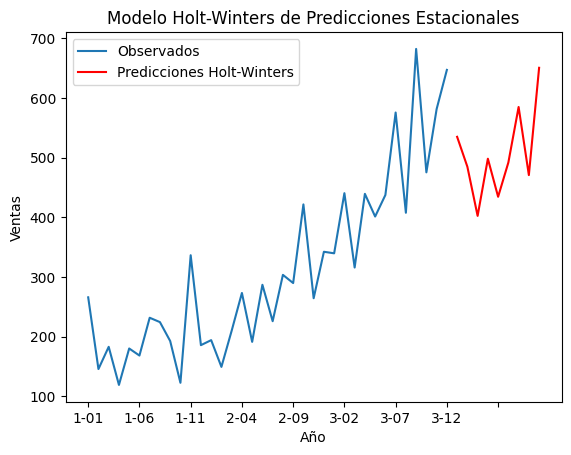

In [171]:
# Modelo Estacional de Holt_winters
modelo = ExponentialSmoothing(datos['Sales'], seasonal = 'mul', seasonal_periods = 12)

# Ajustar (entrenar) el modelo
modelo_ajustado = modelo.fit()
predicciones = modelo_ajustado.forecast(9)

# Graficar los datos y predicciones

datos['Sales'].plot(label = 'Observados')
predicciones.plot(label = 'Predicciones Holt-Winters', color = 'red')
plt.legend()
plt.title("Modelo Holt-Winters de Predicciones Estacionales")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.show()

### SARIMA

### Prophet

## monthly-mean-temp.csv

### Análisis exploratorio

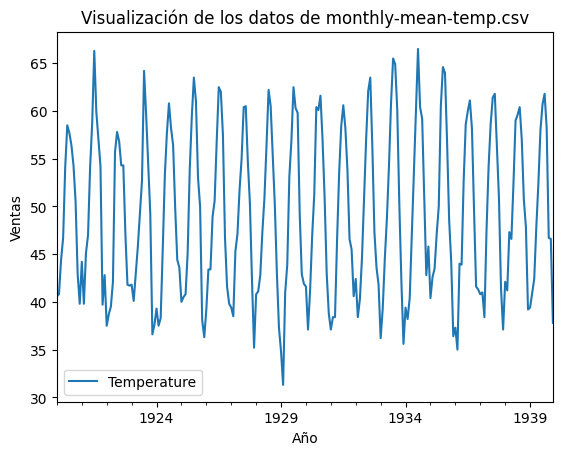

In [172]:
# Leer los datos
filename = 'monthly-mean-temp.csv'
datos = pd.read_csv(f'datasets/{filename}',
                    index_col = 'Month',
                    parse_dates = True)

datos.index.freq = 'MS'

# Graficar los datos y predicciones
datos.plot(label = 'Observadod')

plt.legend()
plt.title(f"Visualización de los datos de {filename}")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.show()

### Promedios móviles

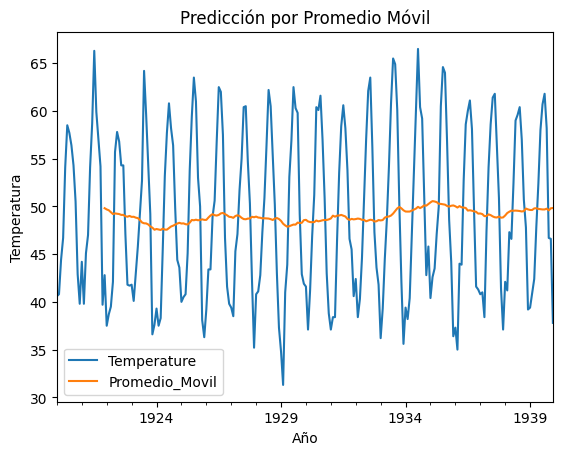

In [173]:
# Promedio Móvil

datos['Promedio_Movil'] = datos['Temperature'].rolling(window = 24).mean()

# Graficar los datos y el Promedio Móvil

datos[['Temperature', 'Promedio_Movil']].plot()
plt.title("Predicción por Promedio Móvil")
plt.xlabel("Año")
plt.ylabel("Temperatura")
plt.show()

### Alisamiento exponencial

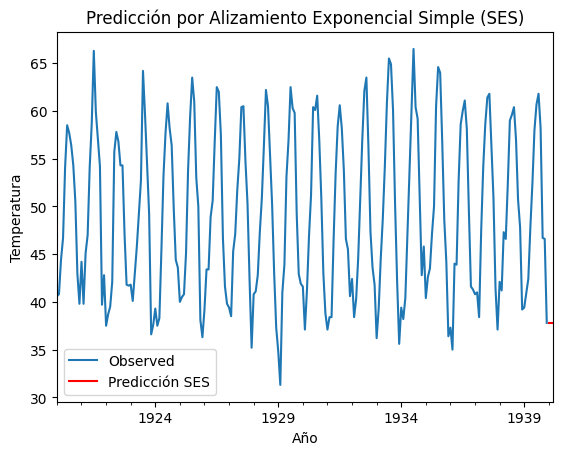

In [174]:
# Alizamiento Exponencial Simple
modelo = SimpleExpSmoothing(datos['Temperature'])

# Ajustar (entrenar() el modelo
modelo_ajustado = modelo.fit()
prediccion = modelo_ajustado.forecast(3)

# Graficar los datos y las predicciones
datos['Temperature'].plot(label = 'Observed')
prediccion.plot(label = 'Predicción SES', color = 'red')
plt.legend()
plt.title("Predicción por Alizamiento Exponencial Simple (SES)")
plt.xlabel("Año")
plt.ylabel("Temperatura")
plt.show()

### Holt winters

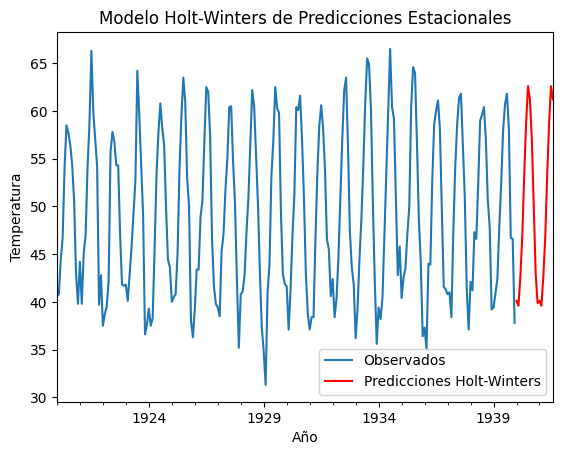

In [175]:
# Modelo Estacional de Holt_winters
modelo = ExponentialSmoothing(datos['Temperature'], seasonal = 'mul', seasonal_periods = 12)

# Ajustar (entrenar) el modelo
modelo_ajustado = modelo.fit()
predicciones = modelo_ajustado.forecast(20)

# Graficar los datos y predicciones

datos['Temperature'].plot(label = 'Observados')
predicciones.plot(label = 'Predicciones Holt-Winters', color = 'red')
plt.legend()
plt.title("Modelo Holt-Winters de Predicciones Estacionales")
plt.xlabel("Año")
plt.ylabel("Temperatura")
plt.show()

### SARIMA

### Prophet

## monthly-car-sales.csv

### Análisis exploratorio

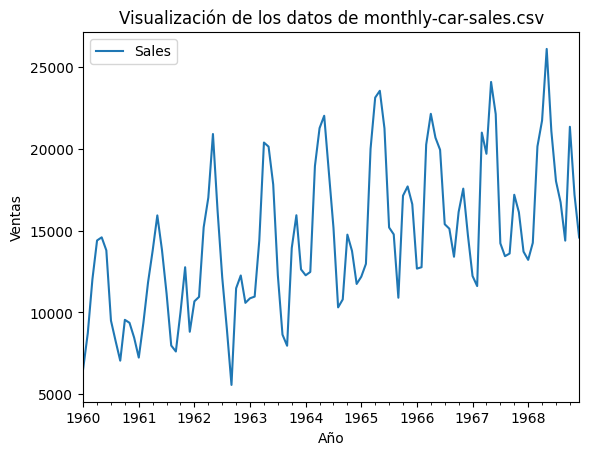

In [176]:
# Leer los datos
filename = 'monthly-car-sales.csv'
datos = pd.read_csv(f'datasets/{filename}',
                    index_col = 'Month',
                    parse_dates = True)

datos.index.freq = 'MS'

# Graficar los datos y predicciones

datos.plot(label = 'Observadod')

plt.legend()
plt.title(f"Visualización de los datos de {filename}")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.show()

### Promedios móviles

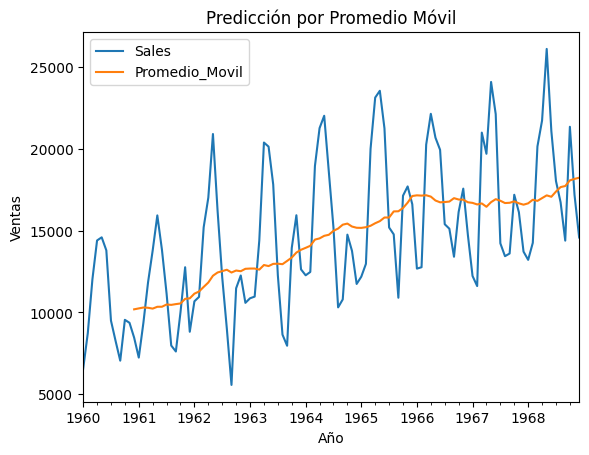

In [177]:
# Promedio Móvil

datos['Promedio_Movil'] = datos['Sales'].rolling(window = 12).mean()

# Graficar los datos y el Promedio Móvil

datos[['Sales', 'Promedio_Movil']].plot()
plt.title("Predicción por Promedio Móvil")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.show()

### Alisamiento exponencial

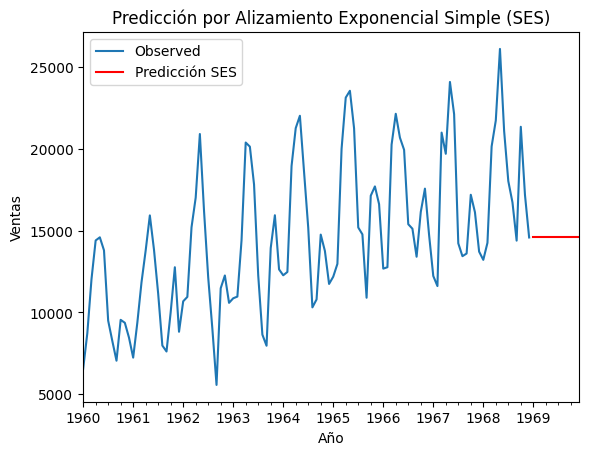

In [178]:
# Alizamiento Exponencial Simple
modelo = SimpleExpSmoothing(datos['Sales'])

# Ajustar (entrenar() el modelo
modelo_ajustado = modelo.fit()
prediccion = modelo_ajustado.forecast(12)

# Graficar los datos y las predicciones
datos['Sales'].plot(label = 'Observed')
prediccion.plot(label = 'Predicción SES', color = 'red')
plt.legend()
plt.title("Predicción por Alizamiento Exponencial Simple (SES)")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.show()

### Holt winters

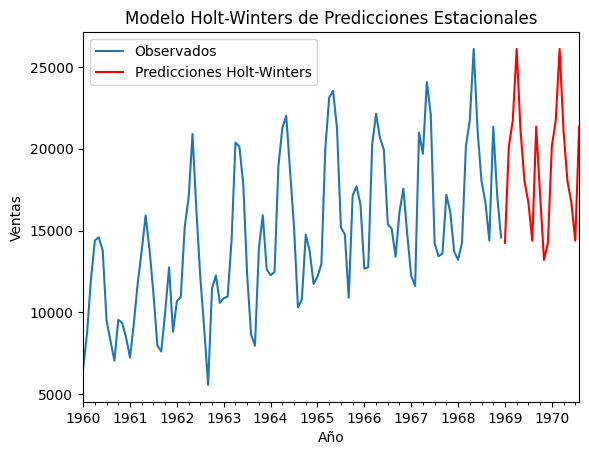

In [179]:
# Modelo Estacional de Holt_winters
modelo = ExponentialSmoothing(datos['Sales'], seasonal = 'mul', seasonal_periods = 11)

# Ajustar (entrenar) el modelo
modelo_ajustado = modelo.fit()
predicciones = modelo_ajustado.forecast(20)

# Graficar los datos y predicciones

datos['Sales'].plot(label = 'Observados')
predicciones.plot(label = 'Predicciones Holt-Winters', color = 'red')
plt.legend()
plt.title("Modelo Holt-Winters de Predicciones Estacionales")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.show()

### ARIMA

### Prophet

## daily-total-female-births.csv

### Análisis exploratorio

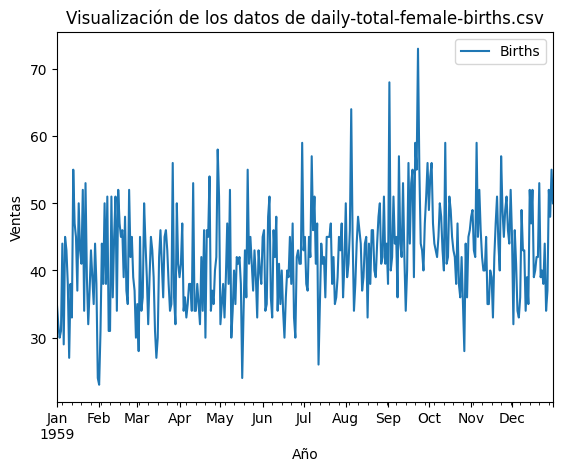

In [180]:
# Leer los datos
filename = 'daily-total-female-births.csv'
datos = pd.read_csv(f'datasets/{filename}',
                    index_col = 'Date',
                    parse_dates = True)

datos.index.freq = 'D'

# Graficar los datos y predicciones

datos.plot(label = 'Observadod')

plt.legend()
plt.title(f"Visualización de los datos de {filename}")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.show()

### Promedios móviles

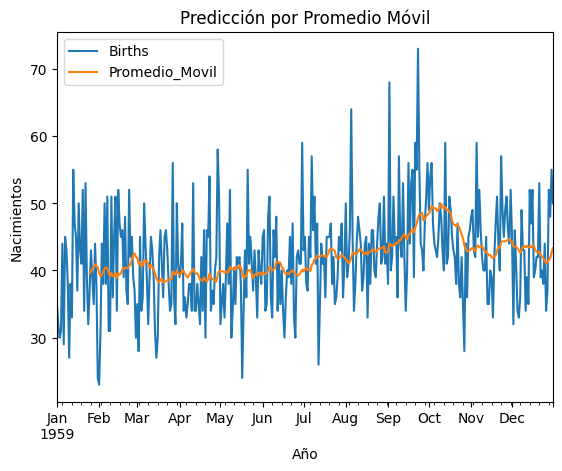

In [181]:
# Promedio Móvil

datos['Promedio_Movil'] = datos['Births'].rolling(window = 25).mean()

# Graficar los datos y el Promedio Móvil

datos[['Births', 'Promedio_Movil']].plot()
plt.title("Predicción por Promedio Móvil")
plt.xlabel("Año")
plt.ylabel("Nacimientos")
plt.show()

### Alisamiento exponencial

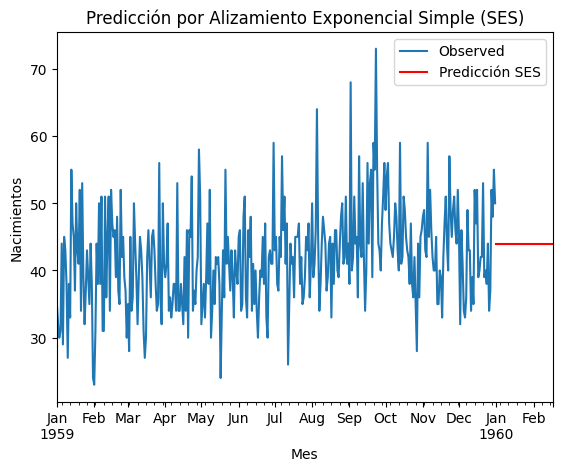

In [182]:
# Alizamiento Exponencial Simple
modelo = SimpleExpSmoothing(datos['Births'])

# Ajustar (entrenar() el modelo
modelo_ajustado = modelo.fit()
prediccion = modelo_ajustado.forecast(48)

# Graficar los datos y las predicciones
datos['Births'].plot(label = 'Observed')
prediccion.plot(label = 'Predicción SES', color = 'red')
plt.legend()
plt.title("Predicción por Alizamiento Exponencial Simple (SES)")
plt.xlabel("Mes")
plt.ylabel("Nacimientos")
plt.show()

### Holt winter

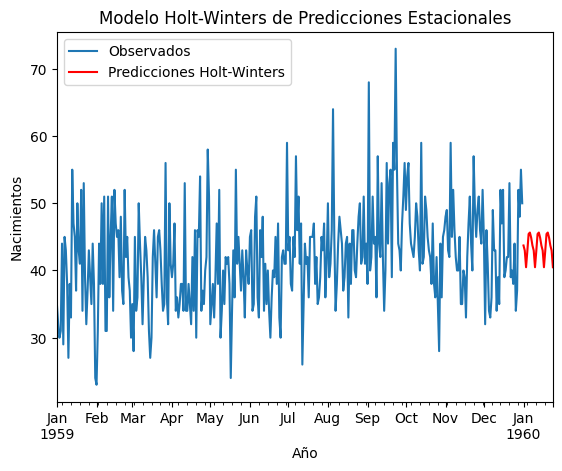

In [ ]:
# Modelo Estacional de Holt_winters
modelo = ExponentialSmoothing(datos['Births'], seasonal = 'mul', seasonal_periods = 31)

# Ajustar (entrenar) el modelo
modelo_ajustado = modelo.fit()
predicciones = modelo_ajustado.forecast(24)

# Graficar los datos y predicciones

datos['Births'].plot(label = 'Observados')
predicciones.plot(label = 'Predicciones Holt-Winters', color = 'red')
plt.legend()
plt.title("Modelo Holt-Winters de Predicciones Estacionales")
plt.xlabel("Año")
plt.ylabel("Nacimientos")
plt.show()

### ARIMA

### Prophet